In [ ]:
# we just used this in the begining when we were planning out the project

import yfinance as yf
import pandas as pd

# Load stock data for a specific ticker
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Display the first few rows
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         AAPL      AAPL      AAPL      AAPL      AAPL   
Date                                                                          
2010-01-04 00:00:00+00:00  6.454506  7.643214  7.660714  7.585000  7.622500   
2010-01-05 00:00:00+00:00  6.465666  7.656429  7.699643  7.616071  7.664286   
2010-01-06 00:00:00+00:00  6.362819  7.534643  7.686786  7.526786  7.656429   
2010-01-07 00:00:00+00:00  6.351058  7.520714  7.571429  7.466071  7.562500   
2010-01-08 00:00:00+00:00  6.393281  7.570714  7.571429  7.466429  7.510714   

Price                         Volume  
Ticker                          AAPL  
Date                                  
2010-01-04 00:00:00+00:00  493729600  
2010-01-05 00:00:00+00:00  601904800  
2010-01-06 00:00:00+00:00  552160000  
2010-01-07 00:00:00+00:00  477131200  
2010-01-08 00:00:00+00:00  447610800  


In [2]:
import numpy as np

# Calculate the percentage change in closing price from quarter to quarter
data['Quarterly Change'] = data['Close'].pct_change(90)  # approx. 90 trading days in a quarter
data = data.dropna()  # Drop rows with NaN values due to pct_change calculation

# Features (e.g., quarterly change)
X = data[['Quarterly Change']].values  # You could add more features here like volume, moving averages, etc.
# Label (we are predicting the closing price)
y = data['Close'].values

# Display first few rows of processed data
print(data[['Close', 'Quarterly Change']].head())


Price                         Close Quarterly Change
Ticker                         AAPL                 
Date                                                
2010-05-13 00:00:00+00:00  9.227143         0.207233
2010-05-14 00:00:00+00:00  9.065000         0.183972
2010-05-17 00:00:00+00:00  9.079286         0.205005
2010-05-18 00:00:00+00:00  9.012857         0.198405
2010-05-19 00:00:00+00:00  8.869286         0.171526


In [3]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


C:\Users\quinn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, print a few predictions vs actual values
print("Sample Predictions vs Actual Prices:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Mean Squared Error: 3202.957464971209
Sample Predictions vs Actual Prices:
Actual: [23.07250023], Predicted: 72.16312414169312
Actual: [153.11999512], Predicted: 56.569232845306395
Actual: [14.21678638], Predicted: 25.304800548553466
Actual: [14.38000011], Predicted: 28.634186182022095
Actual: [25.1875], Predicted: 33.899624519348144


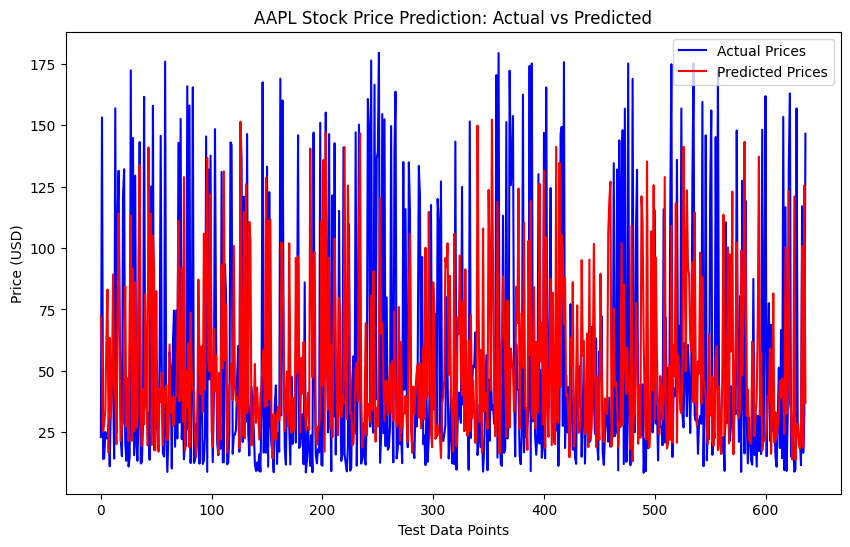

In [6]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


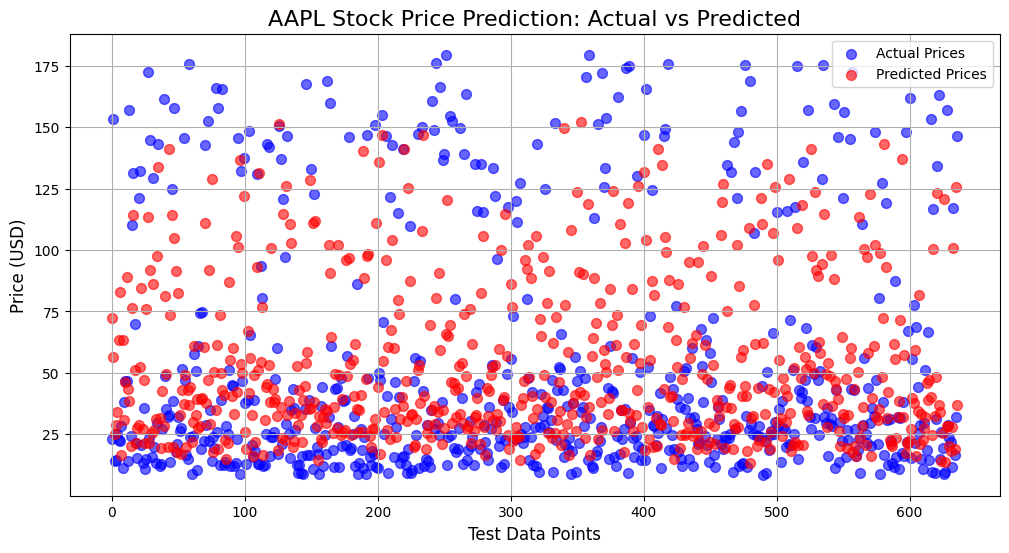

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(12, 6))

# Plot actual prices as blue scatter points
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices', s=50, alpha=0.6)

# Plot predicted prices as red scatter points
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', s=50, alpha=0.6)

# Add title and labels
plt.title(f'{ticker} Stock Price Prediction: Actual vs Predicted', fontsize=16)
plt.xlabel('Test Data Points', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
